In [71]:
import pandas as pd
import time
from datetime import datetime, timedelta
import numpy as np
import warnings
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [126]:
df = pd.read_csv('Desktop/main_dataframe.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2548 non-null   int64  
 1   Date                   2548 non-null   object 
 2   NVDA Open              2548 non-null   float64
 3   NVDA High              2548 non-null   float64
 4   NVDA Low               2548 non-null   float64
 5   NVDA Close             2548 non-null   float64
 6   NVDA Volume            2548 non-null   int64  
 7   NVDA Daily change      2548 non-null   float64
 8   NVDA Daily change Max  2548 non-null   float64
 9   AAPL Open              2548 non-null   float64
 10  AAPL High              2548 non-null   float64
 11  AAPL Low               2548 non-null   float64
 12  AAPL Close             2548 non-null   float64
 13  AAPL Volume            2548 non-null   float64
 14  AAPL Daily change      2548 non-null   float64
 15  AAPL

In [134]:
df['Date'] = pd.to_datetime(df['Date']).copy()
df["Date"]= pd.to_datetime(df.Date,format="%Y-%m-%d").copy()
#df['Date'] = pd.to_numeric(pd.to_datetime(df['Date'])).copy()
i = 0
while i  < 2547:
    temp = pd.Timestamp(df["Date"][i])
    df['Day'][i] = temp.dayofweek
    i=i+1


df.head()

C:\Users\vikto\AppData\Local\Temp/ipykernel_8252/1898484272.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'][i] = temp.dayofweek


,Unnamed: 0,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,...,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max,Day
0,0,2022-05-06,187.36,195.12,179.90,186.75,63299300,-0.325576,8.460256,156.01,...,-0.029111,2.941719,44.49,45.15,43.84,44.30,40910000.0,-0.427062,2.988139,4
1,0,2022-05-04,194.00,198.25,191.33,196.02,47575100,1.041237,3.616788,159.67,...,-0.767714,1.420667,45.06,46.64,44.41,46.54,44625600.0,3.284510,5.021392,2
2,0,2022-05-03,185.41,195.74,183.91,195.33,57204900,5.350305,6.432494,158.15,...,2.434194,3.156904,44.79,45.49,44.23,45.06,40158400.0,0.602813,2.848745,1
3,0,2022-05-02,194.02,201.28,185.17,185.47,50001100,-4.406762,8.700113,156.71,...,-3.842556,4.839060,43.72,44.99,43.51,44.96,45446500.0,2.836231,3.401517,0
4,0,2022-04-29,189.67,200.37,184.90,197.82,57032700,4.296937,8.366685,161.84,...,1.556857,3.382363,44.99,45.36,43.50,43.59,70726300.0,-3.111803,4.275862,4


In [79]:
timestamp = 1528797322
date_time = datetime.fromtimestamp(timestamp)

d = date_time.strftime("%c")
print("Output 1:", d)

Output 1: Tue Jun 12 12:55:22 2018


<AxesSubplot:>

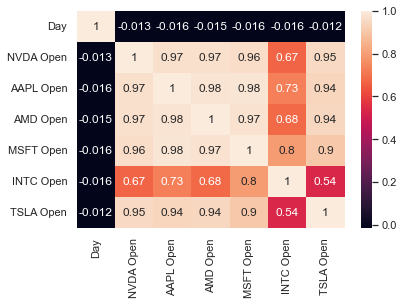

In [135]:
tdf = pd.DataFrame(df, columns = ['NVDA Open','AAPL Open','AMD Open','MSFT Open','INTC Open','TSLA Open'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

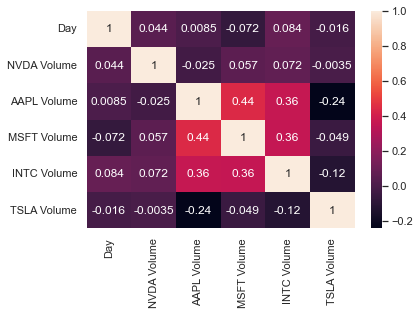

In [136]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','AAPL Volume','AMD Volume','MSFT Volume','INTC Volume','TSLA Volume'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

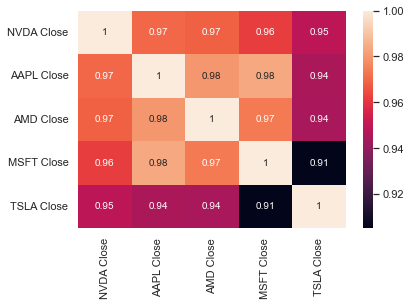

In [40]:
tdf = pd.DataFrame(df, columns = ['NVDA Close','AAPL Close','AMD Close','MSFT Close','TSLA Close'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

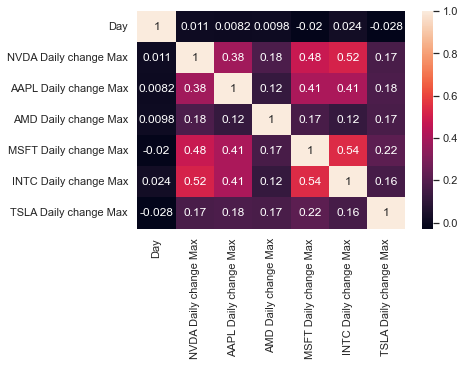

In [137]:
tdf = pd.DataFrame(df, columns = ['NVDA Daily change Max','AAPL Daily change Max','AMD Daily change Max','MSFT Daily change Max','INTC Daily change Max','TSLA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

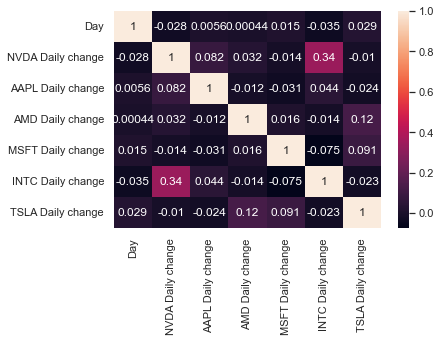

In [138]:
tdf = pd.DataFrame(df, columns = ['Day','NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

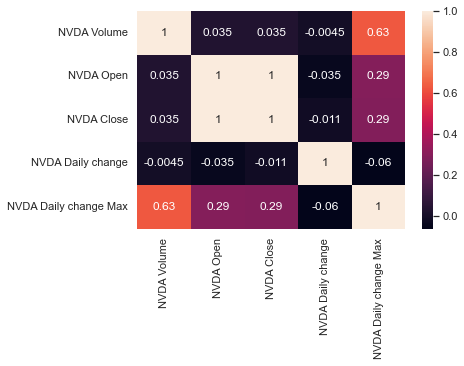

In [57]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','NVDA Open','NVDA Close','NVDA Daily change','NVDA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)

In [133]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#!pip install plotly
#!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from chart_studio import plotly


import plotly.offline as pyoff

from plotly.offline import iplot




from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [230]:
layout = go.Layout(
    title = 'Stock Prices',
    xaxis = dict(
        title = 'Date',
        titlefont = dict(
            family = 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis = dict(
        title = 'Date',
        titlefont = dict(
            family = 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    )
)
tdf = pd.DataFrame(df, columns = [ 'Date' , 'TSLA Open', 'TSLA High','TSLA Low' , 'TSLA Close','MSFT Daily change','TSLA Daily change Max'])
tesla_data =[{'x': tdf['Date'], 'y':tdf['TSLA Close'] }]
layout.xaxis.title.text = 'Day'
plot =go.Figure(data = tesla_data, layout = layout)


In [231]:
iplot(plot)

In [146]:
X = np.array(tdf).reshape(-1,1)
Y = tdf['TSLA Close']



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=101, test_size = 0.3)


ValueError: Found input variables with inconsistent numbers of samples: [17836, 2548]

In [139]:
Scaler = StandardScaler().fit(X_train)

ValueError: could not convert string to float: 'Nov 27, 2020'

In [140]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

ValueError: could not convert string to float: 'Nov 27, 2020'

In [159]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data =[trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 =go.Figure(data = tesla_data, layout = layout)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [142]:
iplot(plot2)

In [272]:
import matplotlib.pyplot as plt
%matplotlib inline

#!pip install keras
#pip install tensorflow
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [273]:
tdf = pd.DataFrame(df, columns = [ 'Date' , 'TSLA Open', 'TSLA High','TSLA Low' , 'TSLA Close','TSLA Daily change','TSLA Volume'])
tdf['Date'] = pd.to_datetime(tdf['Date']).copy()
tdf["Date"]= pd.to_datetime(tdf.Date,format="%Y-%m-%d").copy()
tdf.index=tdf['Date']
tdf['Date'] = pd.to_numeric(pd.to_datetime(tdf['Date'])).copy()
tdf.head()




,Date,TSLA Open,TSLA High,TSLA Low,TSLA Close,TSLA Daily change,TSLA Volume
Date,,,,,,,
2010-06-29,1277769600000000000,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,1277856000000000000,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,1277942400000000000,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02,1278028800000000000,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06,1278374400000000000,NaN,NaN,NaN,NaN,NaN,NaN


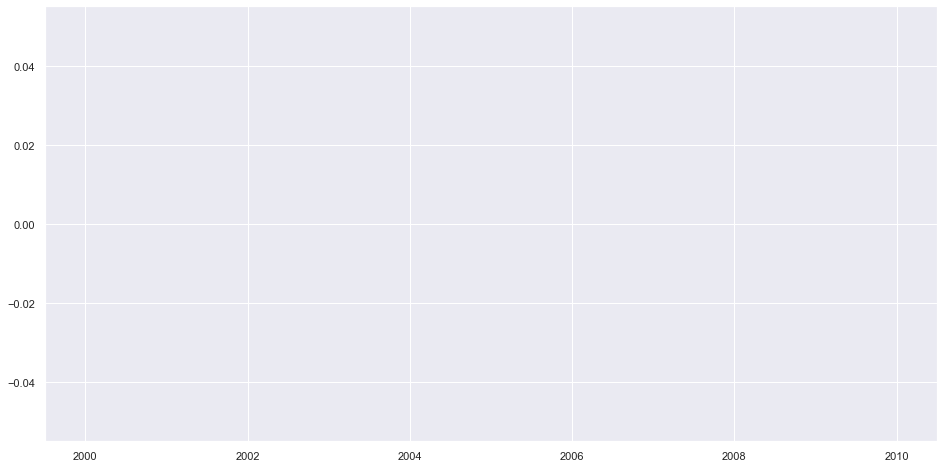

In [274]:
plt.figure(figsize=(16,8))
plt.plot(tdf["TSLA Close"],label='Close Price history')

In [267]:
data=tdf.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','TSLA Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["TSLA Close"][i]=data["TSLA Close"][i]
    


In [271]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:987,:]
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

AttributeError: 'DataFrame' object has no attribute 'Date'

In [269]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

ValueError: X has 1 features, but MinMaxScaler is expecting 2 features as input.

In [270]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.float64).

In [39]:
import pandas as PD
#!pip install numpy
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
#!pip install -U scikit-learn
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
#!pip install keras
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras. Backend as K
from keras.callbacks import EarlyStopping
from keras.optimisers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

AttributeError: module 'sklearn.utils._openmp_helpers' has no attribute '__pyx_capi__'

ERROR: Could not find a version that satisfies the requirement timeseriessplit (from versions: none)
ERROR: No matching distribution found for timeseriessplit


In [27]:
tdf = pd.DataFrame(df, columns = [ 'Date' , 'TSLA Open', 'TSLA High','TSLA Low' , 'TSLA Close','TSLA Daily change','TSLA Volume'])
tdf['Date'] = pd.to_datetime(tdf['Date']).copy()
tdf["Date"]= pd.to_datetime(tdf.Date,format="%Y-%m-%d").copy()
tdf.head()


,Date,TSLA Open,TSLA High,TSLA Low,TSLA Close,TSLA Daily change,TSLA Volume
0,2022-05-06,887.00,888.00,843.11,865.65,-2.406990,24264100.0
1,2022-05-04,903.18,924.08,888.59,909.25,0.672070,21236500.0
2,2022-05-03,860.77,906.36,848.03,902.94,4.899102,25260500.0
3,2022-05-02,902.25,934.40,870.00,870.76,-3.490163,29313400.0
4,2022-04-29,899.98,900.00,821.70,877.51,-2.496722,41649500.0


<AxesSubplot:>

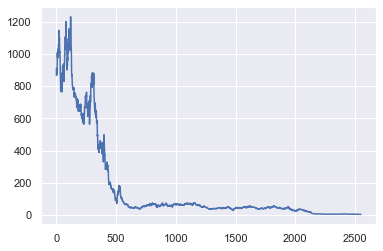

In [28]:
tdf['TSLA Close'].plot()

In [30]:
utput_var = pd.DataFrame(tdf['TSLA Close'])

features = ['TSLA Open', 'TSLA High', 'TSLA Low', 'TSLA Volume']

In [31]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,TSLA Open,TSLA High,TSLA Low,TSLA Volume
0,0.717557,0.713053,0.691688,0.076001
1,0.730712,0.742176,0.729191,0.066026
2,0.696233,0.727873,0.695745,0.079284
3,0.729956,0.750507,0.713862,0.092638
4,0.728110,0.722739,0.674033,0.133285


In [32]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

NameError: name 'TimeSeriesSplit' is not defined